In [1]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
# imports for models
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import LabelEncoder, Imputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# Load pre-processed data

In [3]:
# read in and split the data
mod_data = pd.read_csv('data/train_50.csv')
X_train, X_test, y_train, y_test = train_test_split(
    mod_data.drop(columns=['status_group']), mod_data['status_group'],
    test_size=0.33, random_state=1)

X_train.head()


,id,amount_tsh,region_code,district_code,population,public_meeting,permit,construction_year,basin_Internal,basin_Lake Nyasa,...,funder_Rwssp,funder_Shipo,funder_Tasaf,funder_Tcrs,funder_Unicef,funder_Water,funder_Wateraid,funder_World Bank,funder_World Vision,funder_Wsdp
4616,52699,0.0,60,43,110,1,0,2008,0,0,...,0,0,0,0,0,0,0,0,0,0
8621,1757,0.0,13,4,134,1,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
24274,27264,0.0,3,2,430,1,0,1993,0,0,...,0,0,0,0,0,0,0,0,0,0
3086,52477,0.0,17,3,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23240,37072,500.0,5,4,280,1,1,1996,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training and testing models

## Random Forest

In [4]:
# Random forest
start_time = time.time()

# fit random forest
clf = RandomForestClassifier(n_jobs=2, random_state=0)
start_time = time.time()
clf.fit(X_train,y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,clf.predict(X_test)))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


--- 0.6693806648254395 seconds ---
              precision    recall  f1-score   support

           0       0.78      0.85      0.82     10630
           1       0.80      0.74      0.77      7572
           2       0.41      0.28      0.34      1400

    accuracy                           0.77     19602
   macro avg       0.66      0.62      0.64     19602
weighted avg       0.76      0.77      0.76     19602



## Decision Tree

In [5]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
start_time = time.time()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

## evaluate decision tree
print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


--- 1.0613460540771484 seconds ---
[[8301 1656  673]
 [1763 5481  328]
 [ 666  287  447]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78     10630
           1       0.74      0.72      0.73      7572
           2       0.31      0.32      0.31      1400

    accuracy                           0.73     19602
   macro avg       0.61      0.61      0.61     19602
weighted avg       0.73      0.73      0.73     19602



## K-Nearest Neighbors (KNN)

--- 5.468376636505127 seconds ---
[[8301 1656  673]
 [1763 5481  328]
 [ 666  287  447]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78     10630
           1       0.74      0.72      0.73      7572
           2       0.31      0.32      0.31      1400

    accuracy                           0.73     19602
   macro avg       0.61      0.61      0.61     19602
weighted avg       0.73      0.73      0.73     19602



Text(0, 0.5, 'Mean Error')

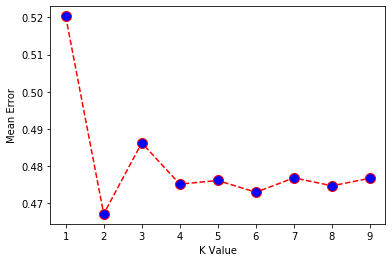

In [6]:
# KNN
kVals = range(1,10)
error = []

for i in kVals:
    knn = KNeighborsClassifier(n_neighbors=i)
    if i == kVals[-1]: start_time = time.time()
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

## evaluate KNN
print("--- %s seconds ---" % (time.time() - start_time))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## plot KNN performance to K value
plt.plot(kVals, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.xlabel('K Value')
plt.ylabel('Mean Error')

## XGBoost

In [7]:
clf_xgb = XGBClassifier(objective='multi:softmax')

start_time = time.time()
clf_xgb.fit(X_train,y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,clf_xgb.predict(X_test)))


--- 29.14628505706787 seconds ---
              precision    recall  f1-score   support

           0       0.71      0.94      0.81     10630
           1       0.86      0.59      0.70      7572
           2       0.63      0.09      0.15      1400

    accuracy                           0.75     19602
   macro avg       0.73      0.54      0.55     19602
weighted avg       0.76      0.75      0.72     19602



## Support Vector Machine (SVM)

In [8]:
# SVM

clf_svm = LinearSVC(random_state=0)

start_time = time.time()
clf_svm.fit(X_train,y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,clf_svm.predict(X_test)))


--- 18.03048872947693 seconds ---
              precision    recall  f1-score   support

           0       0.61      0.95      0.74     10630
           1       0.77      0.31      0.45      7572
           2       0.00      0.00      0.00      1400

    accuracy                           0.63     19602
   macro avg       0.46      0.42      0.40     19602
weighted avg       0.63      0.63      0.57     19602



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression

In [9]:
# Logistic Regression
clf_lr = SGDClassifier(loss='log',random_state=0)

start_time = time.time()
clf_lr.fit(X_train,y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,clf_lr.predict(X_test)))

--- 17.704241275787354 seconds ---
              precision    recall  f1-score   support

           0       0.70      0.05      0.10     10630
           1       0.52      0.06      0.11      7572
           2       0.07      0.92      0.13      1400

    accuracy                           0.12     19602
   macro avg       0.43      0.35      0.12     19602
weighted avg       0.59      0.12      0.11     19602

